In [10]:
import pandas as pd
import sklearn
import warnings

from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_absolute_error
from sklearn import svm
from sklearn.model_selection import train_test_split
warnings.filterwarnings('ignore')

In [11]:
df = pd.read_csv('data.csv')
print(df)

    Rain Fall (mm)  Fertilizer  Temperatue  Nitrogen (N)  Phosphorus (P)  \
0             1230          80          28            80              24   
1              480          60          36            70              20   
2             1250          75          29            78              22   
3              450          65          35            70              19   
4             1200          80          27            79              22   
..             ...         ...         ...           ...             ...   
94            1250          77          28            78              23   
95             425          60          39            65              19   
96            1220          79          28            77              23   
97             480          65          36            68              21   
98            1230          80          28            80              24   

    Potassium (K)  Yeild (Q/acre)  
0              20              12  
1              

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99 entries, 0 to 98
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   Rain Fall (mm)  99 non-null     int64
 1   Fertilizer      99 non-null     int64
 2   Temperatue      99 non-null     int64
 3   Nitrogen (N)    99 non-null     int64
 4   Phosphorus (P)  99 non-null     int64
 5   Potassium (K)   99 non-null     int64
 6   Yeild (Q/acre)  99 non-null     int64
dtypes: int64(7)
memory usage: 5.5 KB


In [13]:
x = df.iloc[:, :6].values
y = df.iloc[:, 6].values

print(x)

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.10, random_state=42)

[[1230   80   28   80   24   20]
 [ 480   60   36   70   20   18]
 [1250   75   29   78   22   19]
 [ 450   65   35   70   19   18]
 [1200   80   27   79   22   19]
 [ 500   70   34   74   22   16]
 [1275   71   28   77   21   20]
 [ 425   65   37   67   18   15]
 [1200   77   27   78   23   20]
 [ 400   50   39   60   18   15]
 [1280   80   26   80   24   20]
 [ 415   55   38   65   19   17]
 [1225   79   29   79   23   20]
 [ 425   50   37   65   18   19]
 [1250   70   24   70   22   18]
 [ 400   60   39   60   18   15]
 [1300   80   28   80   24   20]
 [ 410   55   36   65   21   16]
 [1150   77   28   76   23   20]
 [1200   78   27   78   23   19]
 [ 410   50   37   59   19   15]
 [1280   76   26   75   24   19]
 [ 425   55   38   65   19   17]
 [1225   73   29   73   23   20]
 [ 450   50   37   65   18   19]
 [1250   70   24   70   22   18]
 [ 400   60   39   60   18   15]
 [1250   80   28   80   24   20]
 [ 405   55   36   60   21   16]
 [1200   72   29   73   21   19]
 [1150   8

In [14]:
regr = svm.SVR()

In [15]:
regr.fit(x, y)

SVR()

In [16]:
print("Training data:")
print(f"r2 score: {r2_score(y_train, regr.predict(X_train))}")
print(f"mean absolute error: {mean_absolute_error(y_train, regr.predict(X_train))}")

Training data:
r2 score: 0.7708705053799076
mean absolute error: 0.7179719301393925


In [17]:
print("Testing data:")
print(f"r2 score: {r2_score(y_test, regr.predict(X_test))}")
print(f"mean absolute error: {mean_absolute_error(y_test, regr.predict(X_test))}")

Testing data:
r2 score: 0.7946126158192914
mean absolute error: 0.5445890225946554


In [18]:
import pickle

In [19]:
s = pickle.dumps(regr)
regr2 = pickle.loads(s)

In [20]:
from joblib import dump, load
dump(regr, 'SVM_model.joblib') 

['SVM_model.joblib']

In [21]:
from joblib import load
svm = load('SVM_model.joblib')

In [22]:
print("Testing data:")
print(f"r2 score: {r2_score(y_test, svm.predict(X_test))}")
print(f"mean absolute error: {mean_absolute_error(y_test, svm.predict(X_test))}")

Testing data:
r2 score: 0.7946126158192914
mean absolute error: 0.5445890225946554


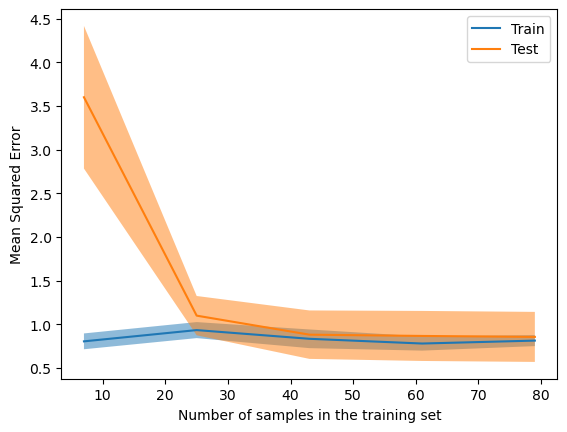

In [25]:
from sklearn.model_selection import LearningCurveDisplay

LearningCurveDisplay.from_estimator(svm, x, y,scoring="neg_mean_squared_error",negate_score=True, score_name="Mean Squared Error")
plt.savefig("static/images/svm1.jpeg")

In [24]:
import matplotlib.pyplot as plt
plt.show()

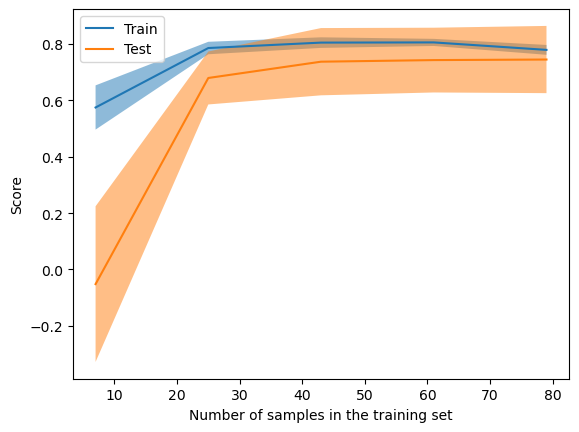

In [26]:
from sklearn.model_selection import LearningCurveDisplay

LearningCurveDisplay.from_estimator(svm, x, y)
plt.savefig("static/images/svm2.jpeg")